<a href="https://colab.research.google.com/github/NguyenThienPhat/NguyenThienPhat-24_02_2023/blob/main/ai_21_04_2023_w12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.4 MB/s eta 0:00:00


4/4 [==============================] - 0s 49ms/step
{'box': [565, 132, 41, 58], 'confidence': 0.9999988675117493, 'keypoints': {'left_eye': (574, 153), 'right_eye': (593, 155), 'nose': (582, 162), 'mouth_left': (572, 173), 'mouth_right': (591, 175)}}
{'box': [219, 83, 34, 47], 'confidence': 0.9999982714653015, 'keypoints': {'left_eye': (230, 99), 'right_eye': (246, 102), 'nose': (238, 108), 'mouth_left': (228, 115), 'mouth_right': (242, 119)}}
{'box': [491, 114, 38, 49], 'confidence': 0.999997079372406, 'keypoints': {'left_eye': (499, 131), 'right_eye': (517, 133), 'nose': (506, 136), 'mouth_left': (497, 148), 'mouth_right': (514, 150)}}
{'box': [145, 231, 39, 47], 'confidence': 0.999992311000824, 'keypoints': {'left_eye': (155, 248), 'right_eye': (173, 248), 'nose': (163, 260), 'mouth_left': (155, 265), 'mouth_right': (173, 264)}}
{'box': [326, 181, 42, 59], 'confidence': 0.9999905228614807, 'keypoints': {'left_eye': (338, 204), 'right_eye': (357, 207), 'nose': (345, 215), 'mouth_left

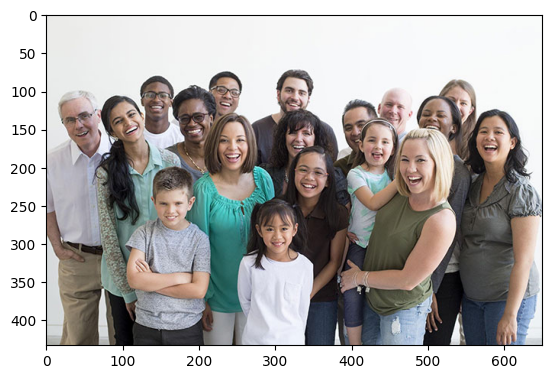

In [ ]:
import decorator
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/AI.jpg'
img=plt.imread(filename)
plt.imshow(img)
dectector=MTCNN()
faces=dectector.detect_faces(img)
for face in faces:
  print(face)



2/2 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 157ms/step
{'box': [36, 87, 7, 9], 'confidence': 0.8005724549293518, 'keypoints': {'left_eye': (35, 89), 'right_eye': (39, 89), 'nose': (36, 91), 'mouth_left': (36, 94), 'mouth_right': (39, 94)}}


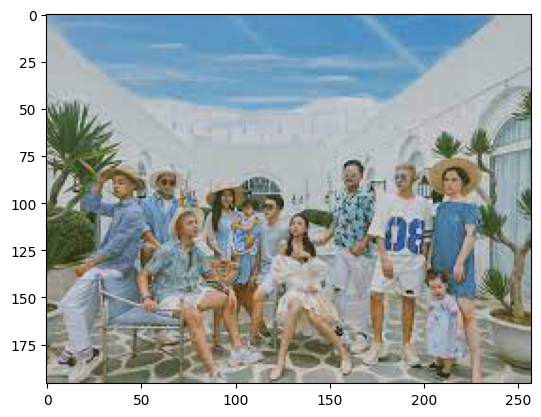

In [ ]:
filename='/content/AI2.jpg'
img=plt.imread(filename)
plt.imshow(img)
dectector=MTCNN()
faces=dectector.detect_faces(img)
for face in faces:
  print(face)

3/3 [==============================] - 0s 10ms/step


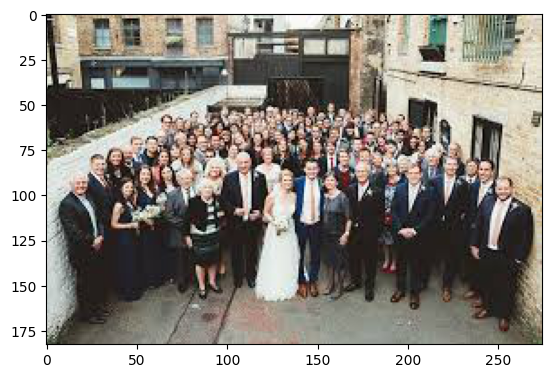

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/AI3.jpg'
img=plt.imread(filename)
dectector=MTCNN()
faces=dectector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  red=plt.Rectangle((x,y),width,height,file=False,color='red')
  ax.add_patch(red)
  plt.savefig('/content/AI3.jpg')  
plt.show()


In [ ]:
img=plt.imread('/content/AI3.jpg')

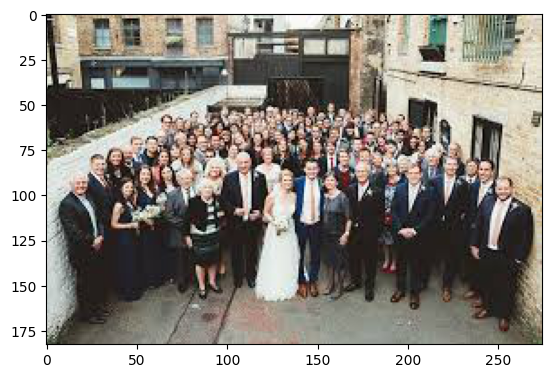

In [ ]:
plt.imshow(img)

3/3 [==============================] - 0s 38ms/step


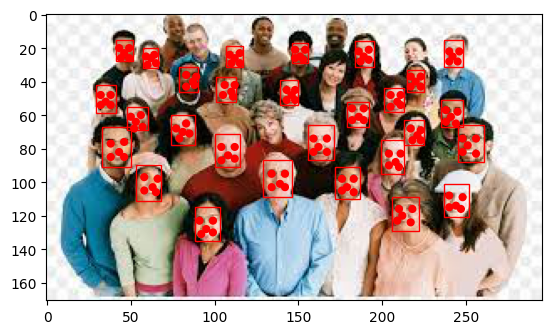

In [ ]:
filename3='/content/AI5.jpg'
img3=plt.imread(filename3)
detector=MTCNN()
faces=detector.detect_faces(img3)
plt.imshow(img3)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  red=plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(red)
  for key,value in face['keypoints'].items():
    dot=plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
  plt.savefig('/content/AI5.jpg')
plt.show() 

2/2 [==============================] - 0s 19ms/step


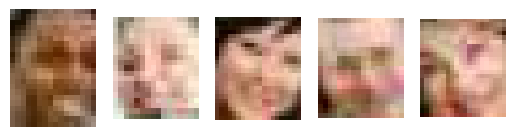

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_face(filename,result_list):
  data=plt.imread(filename)
  for i in range(len(result_list)):
    x1,y1,width,height=result_list[i]['box']
    x2,y2=x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
plt.show()
filename='/content/AI5.jpg'
img=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(img)
draw_face(filename,faces)



1/1 [==============================] - 2s 2s/step
Predicted: [('n02504458', 'African_elephant', 0.48547444), ('n01871265', 'tusker', 0.3109384), ('n02504013', 'Indian_elephant', 0.2032253)]


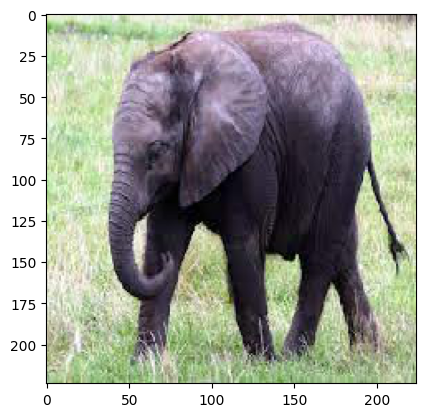

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/AI6.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
plt.imshow(img)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]
plt.show()


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = '/content/tivi16.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)
print('Predicted:', decode_predictions(preds, top=3)[0])
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/lua14.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
Predicted: [('n02129604', 'tiger', 0.89606506), ('n02123159', 'tiger_cat', 0.06965114), ('n02391049', 'zebra', 0.014706338)]


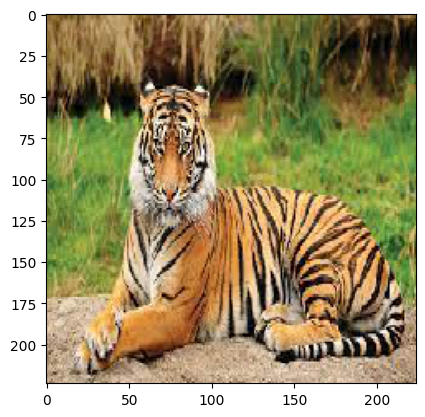

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/cop dong duongAI8.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
plt.imshow(img)
print('Predicted:', decode_predictions(preds, top=3)[0])
plt.show()

1/1 [==============================] - 2s 2s/step
Predicted: [('n02110806', 'basenji', 0.6444173), ('n02109961', 'Eskimo_dog', 0.12386518), ('n02110185', 'Siberian_husky', 0.12027703)]


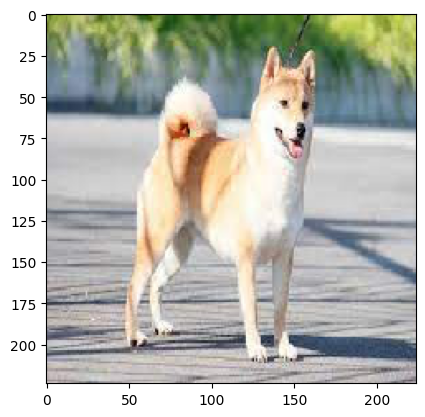

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/choAI9.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
plt.imshow(img)
print('Predicted:', decode_predictions(preds, top=3)[0])
plt.show()

1/1 [==============================] - 1s 1s/step
Predicted: [('n03710637', 'maillot', 0.14261694), ('n09256479', 'coral_reef', 0.12651451), ('n02837789', 'bikini', 0.100583985)]


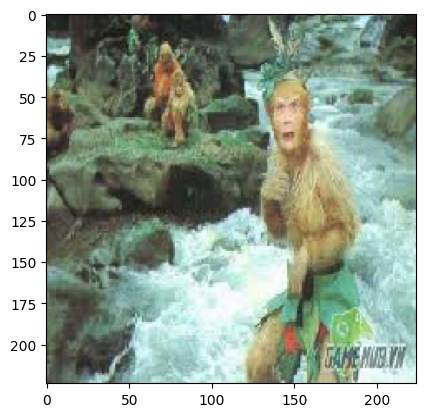

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/nk11.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
plt.imshow(img)
print('Predicted:', decode_predictions(preds, top=3)[0])
plt.show()

1/1 [==============================] - 1s 1s/step
Predicted: [('n06596364', 'comic_book', 0.25944805), ('n03485794', 'handkerchief', 0.23386706), ('n03908618', 'pencil_box', 0.088153966)]


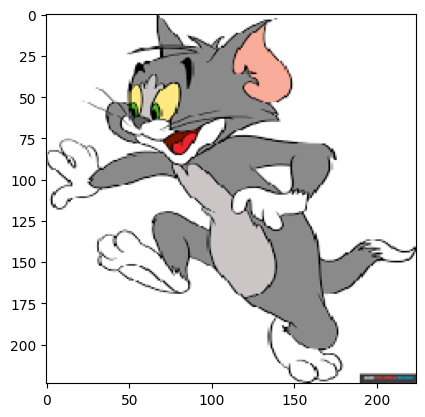

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/tom13.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
plt.imshow(img)
print('Predicted:', decode_predictions(preds, top=3)[0])
plt.show()